# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [2]:
import numpy as np
import pandas as pd

In [3]:
sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [ ]:
sales[sales["sales"] > 10]

# con query:
# sales.query("sales > 10")


,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [7]:
sales[sales['year']==2018]

# con query:
# sales.query("year == 2018")

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [8]:
sales[(sales['sales']>13) & (sales['year']==2018)]

#con query:
# sales.query("sales > 10 & year == 2018")

,employee,sales,year
0,Katrina,14,2018


In [ ]:
sales[(sales["sales"] <= 13) & (sales["year"] != 2018)]

# con query:
# sales.query("sales <= 13 and year != 2018")


,employee,sales,year
2,Jan,6,2020
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
8,Egweyn,5,2020


In [11]:
sales[(sales["sales"] / 3) > 3]

# con query:
# sales.query("sales / 3 > 3")


,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [ ]:
sales[sales["employee"] > "J"]

# con query:
# sales.query("employee > 'J'")


,employee,sales,year
0,Katrina,14,2018
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
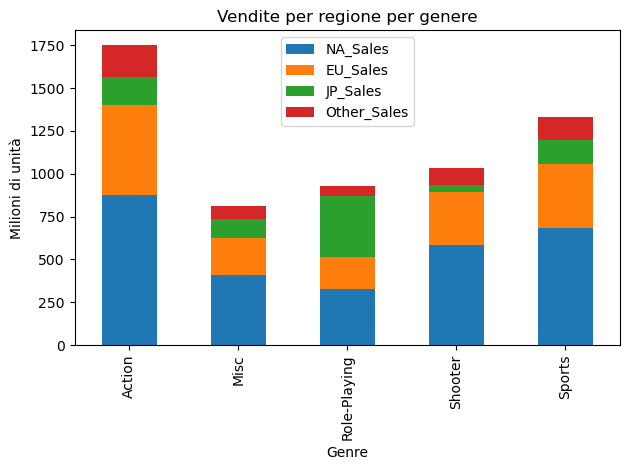


In [5]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [29]:
print("pubblicati:", df.shape[0])

pubblicati: 16598


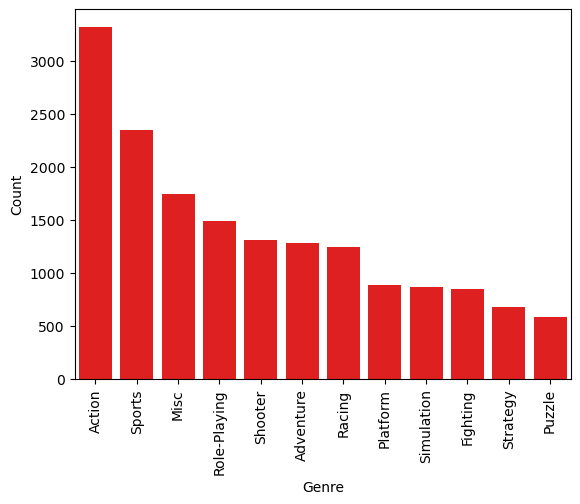

In [30]:
generi = df['Genre'].value_counts().reset_index()
generi.columns = ['Genre', 'Count']

sns.barplot(x='Genre', y='Count', data=generi, color='red')

plt.xticks(rotation=90)   
plt.show()

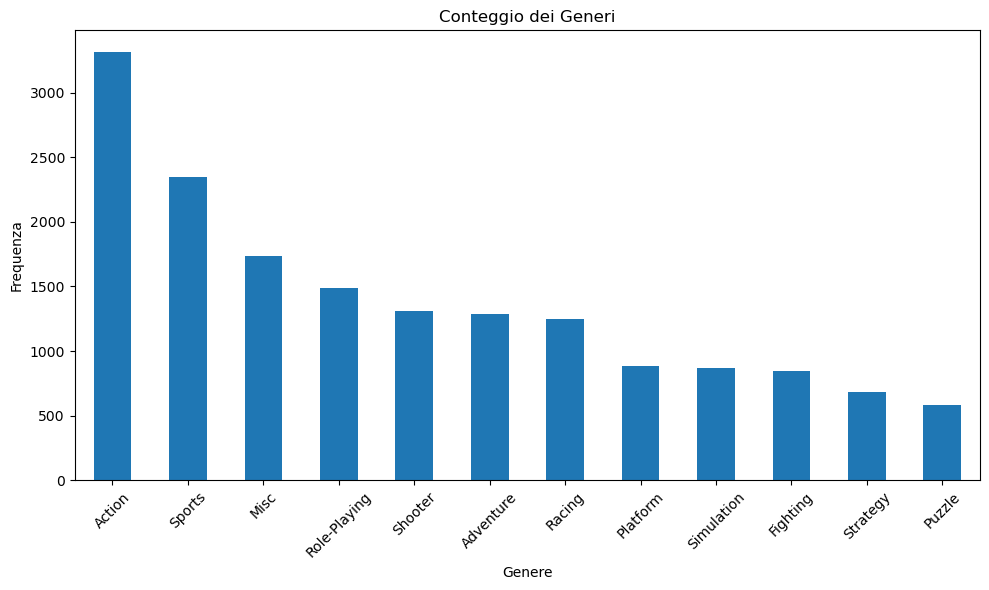

In [ ]:
# metodo prof
genre_count = df['Genre'].value_counts()

plt.figure(figsize=(10, 6))
genre_count.plot(kind='bar')
plt.title('Conteggio dei Generi')
plt.xlabel('Genere')
plt.ylabel('Frequenza')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

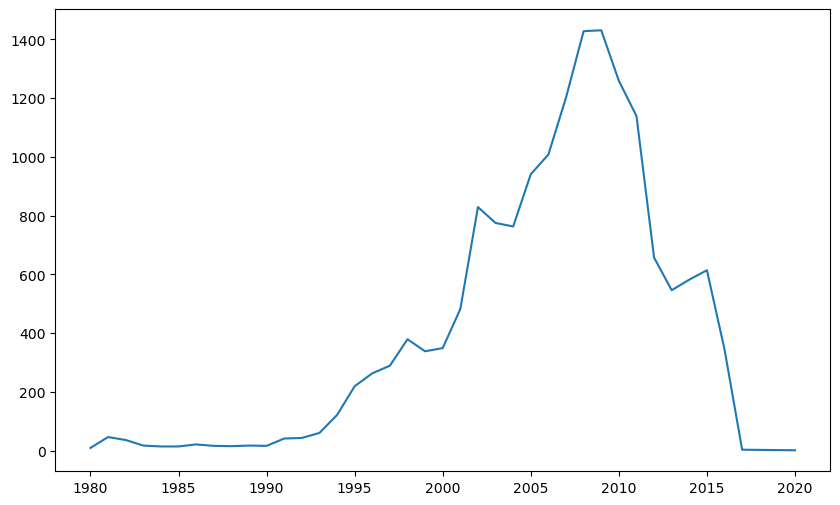

In [ ]:
# metodo prof
anni = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(anni)

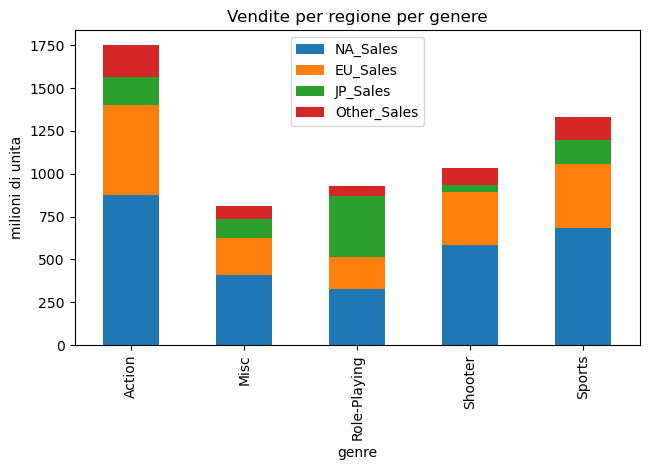

In [ ]:
# metodo prof
generi_migliori = df.groupby('Genre')['Name'].count().sort_values(ascending=False).head(5)

vendite_migliori = df[df['Genre'].apply(lambda generi: generi in generi_migliori.index)].groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()


vendite_migliori.plot(stacked=True, kind="bar")
plt.title("Vendite per regione per genere")
plt.tight_layout()
plt.xlabel("genre")
plt.ylabel("milioni di unita")
plt.show()